##### Importing Sklearn Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Regression
from sklearn.linear_model import LogisticRegression

# For Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# For Splitting and Standardizing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For accuracy
from sklearn import metrics

# For warning
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

##### Importing Dataset

In [2]:
train_df = pd.read_csv('train_csv.csv')
test_df = pd.read_csv('test_csv.csv')

In [3]:
print(train_df.shape)
train_df.head()

(21000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [4]:
print(test_df.shape)
test_df.head()

(9000, 24)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,...,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,...,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,...,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,...,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,...,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


##### Finding NaN value

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
ID                            21000 non-null int64
LIMIT_BAL                     21000 non-null int64
SEX                           21000 non-null int64
EDUCATION                     21000 non-null int64
MARRIAGE                      21000 non-null int64
AGE                           21000 non-null int64
PAY_0                         21000 non-null int64
PAY_2                         21000 non-null int64
PAY_3                         21000 non-null int64
PAY_4                         21000 non-null int64
PAY_5                         21000 non-null int64
PAY_6                         21000 non-null int64
BILL_AMT1                     21000 non-null int64
BILL_AMT2                     21000 non-null int64
BILL_AMT3                     21000 non-null int64
BILL_AMT4                     21000 non-null int64
BILL_AMT5                     21000 non-null int64
BILL_AMT6               

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 24 columns):
ID           9000 non-null int64
LIMIT_BAL    9000 non-null int64
SEX          9000 non-null int64
EDUCATION    9000 non-null int64
MARRIAGE     9000 non-null int64
AGE          9000 non-null int64
PAY_0        9000 non-null int64
PAY_2        9000 non-null int64
PAY_3        9000 non-null int64
PAY_4        9000 non-null int64
PAY_5        9000 non-null int64
PAY_6        9000 non-null int64
BILL_AMT1    9000 non-null int64
BILL_AMT2    9000 non-null int64
BILL_AMT3    9000 non-null int64
BILL_AMT4    9000 non-null int64
BILL_AMT5    9000 non-null int64
BILL_AMT6    9000 non-null int64
PAY_AMT1     9000 non-null int64
PAY_AMT2     9000 non-null int64
PAY_AMT3     9000 non-null int64
PAY_AMT4     9000 non-null int64
PAY_AMT5     9000 non-null int64
PAY_AMT6     9000 non-null int64
dtypes: int64(24)
memory usage: 1.6 MB


In [7]:
train_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [8]:
test_df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

##### Visualization

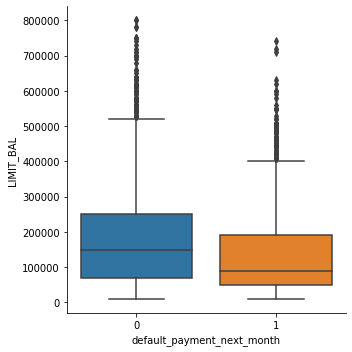

In [9]:
sns.catplot(x = 'default_payment_next_month', y = 'LIMIT_BAL', kind = 'box', data = train_df)

##### Dividing the trainig dataset into 'X' and 'y' 

In [10]:
X = train_df.iloc[:, train_df.columns != 'default_payment_next_month']

In [11]:
y = np.array(train_df['default_payment_next_month'])
y = y.reshape(-1,1)

##### Spitting and Standardizing of the train_df dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

In [14]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Logistic Regression

In [19]:
lr = LogisticRegression(C = 20, n_jobs = -1, verbose = 3)

In [21]:
lr.fit(X_test, y_test)

[LibLinear]

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=3,
                   warm_start=False)

In [22]:
lr_score = lr.score(X_test, y_test)

In [23]:
print('Logistic Regression score = ', round((lr_score)*100 ,2))

Logistic Regression score =  81.55


##### Random Forest Classifier

In [24]:
rfc = RandomForestClassifier(criterion='entropy', n_estimators = 100)

In [25]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
rfc_score = rfc.score(X_test, y_test)

In [27]:
print('Random Forest Classifier score = ', round((rfc_score)*100 ,2))

Random Forest Classifier score =  81.89


##### Support Vector Machines

In [28]:
svm = SVC()

In [29]:
svm.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
svm_score = svm.score(X_test, y_test)

In [31]:
print('Support Vector Machine score = ', round((svm_score)*100 ,2))

Support Vector Machine score =  82.59


##### Since support vector machine gives high score
##### so, for prediction, SVM model is used.

##### Prediction of X_test

In [32]:
y_pred = svm.predict(X_test)

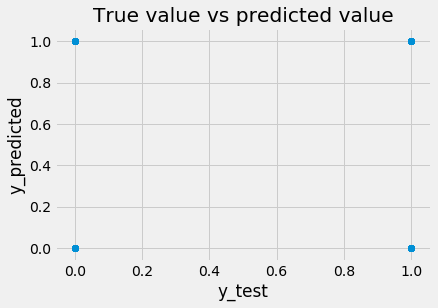

In [34]:
plt.scatter(y_test, y_pred)
plt.ylabel('y_predicted')
plt.xlabel('y_test')

plt.title('True value vs predicted value')

plt.grid(True)

plt.style.use('fivethirtyeight')


##### Prediction on test_df 

In [35]:
test_df['default_payment_next_month'] = svm.predict(test_df)

##### Roc_auc score

In [36]:
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print('Roc_auc score = ', round((roc_auc) * 100, 2))

Roc_auc score =  65.14


##### Confusion Matrix

In [37]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[5519,  199],
       [1081,  551]], dtype=int64)

##### Accuracy Score

In [38]:
acc_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score = ', round((acc_score) * 100, 2))

Accuracy score =  82.59


##### Classification Report

In [39]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      5718
           1       0.73      0.34      0.46      1632

    accuracy                           0.83      7350
   macro avg       0.79      0.65      0.68      7350
weighted avg       0.81      0.83      0.80      7350

